In [1]:
%pip install faiss

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement faiss (from versions: none)
ERROR: No matching distribution found for faiss

[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
from datasets import load_dataset, Image
dataset = load_dataset("ceyda/fashion-products-small", split="train")

c:\Users\dibra\AppData\Local\Programs\Python\Python311\Lib\site-packages\huggingface_hub\repocard.py:105: UserWarning: Repo card metadata block was not found. Setting CardData to empty.
  warnings.warn("Repo card metadata block was not found. Setting CardData to empty.")


In [3]:
import faiss
import json
import numpy as np

# Load embeddings from JSON Lines file
import pandas as pd
df = pd.read_json("data/imagevectors.jsonl", lines=True)

embeddings = np.stack(df['vector'].values).astype('float32')

print(embeddings.shape[1])

1024


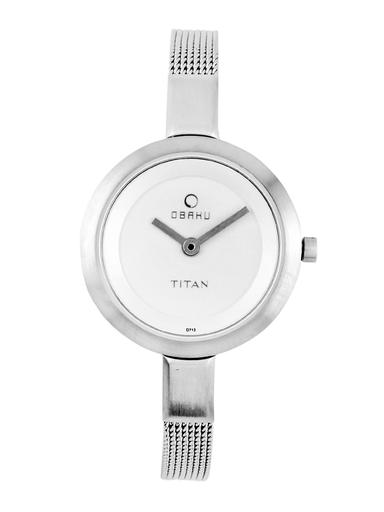

In [67]:
# Number of dimensions.
dimension = embeddings.shape[1]

query_index = 2
query_vector = np.array([embeddings[query_index]]).astype('float32')
dataset[query_index]["image"]

[[1.         0.81988144 0.802505  ]]
Most similar product of 2 = [[   2 5652 1858]]


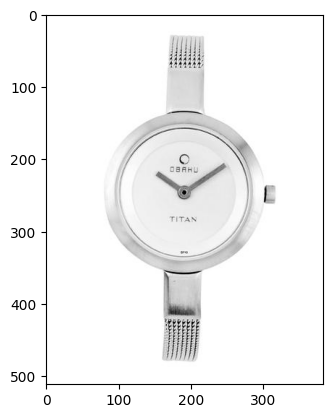

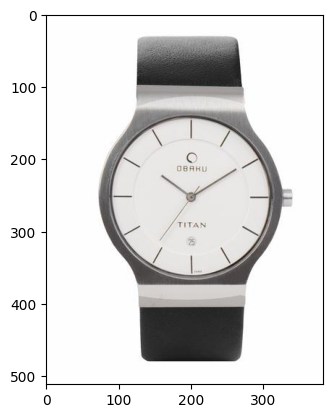

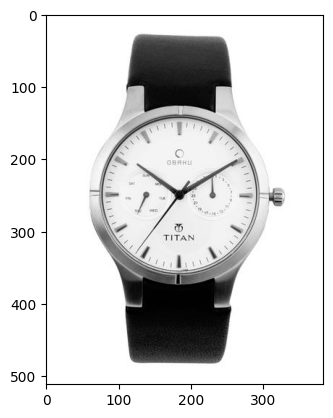

In [66]:
import matplotlib.pyplot as plt
# Normalizing embeddings for cosine similarity
faiss.normalize_L2(embeddings)

# Creating the index for cosine similarity
index = faiss.IndexFlatIP(dimension)
index.add(embeddings)

# Function to search for the most similar vectors
def search_similar_vectors(query_vector, k=3):
    faiss.normalize_L2(query_vector)
    distances, indices = index.search(query_vector, k)
    print(distances)
    return indices

similar_indices = search_similar_vectors(query_vector)
print(f"Most similar product of {query_index} = {similar_indices}")
len(similar_indices[0])
for i in similar_indices[0]:
    img = dataset[np.uint32(i).item()]["image"]
    plt.figure()
    plt.imshow(img)